# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:

import pandas as pd
import numpy as np
import seaborn 
airbnbData=pd.read_csv('train.csv', encoding='latin')
print('Shape before deleting duplicate values:', airbnbData.shape)

# Removing duplicate rows if any
airbnbData=airbnbData.drop_duplicates()
print('Shape After deleting duplicate values:', airbnbData.shape)


airbnbData.head(10)


Shape before deleting duplicate values: (74111, 29)
Shape After deleting duplicate values: (74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room èéå¤§åºæ¿,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


## Key observations from Step 1 about Data Description


*   This file contains 74111 house details from the Boston city.
*   There are 20 attributes and they are outlined below.
*   id - the airbnb id
*   log_price - the logarithmic price that represents proportional changes and are used for long term price changes.
*   property_type - the type of building like house or condo
*   room_type - whether its the entire house or not
*   amenities
*   accommodates
*   bathrooms
*   bed_type
*   cancellation_policy - what level the cancellation policy is
*   cleaning_fee
*   latitude 
*   longitude	
*   name - name of the Airbnb
*   neighbourhood
*   number_of_reviews	
*   review_scores_rating	
*   thumbnail_url	
*   zipcode	
*   bedrooms	
*   beds




# Problem Statement Definition
* Creating a prediction model to predict the log price( log_price ) of a house
* Target Variable: log_price
Predictors/Features: beds, bedrooms, zipcode, neighbourhood, cleaning_fee, bathrooms.

<Axes: >

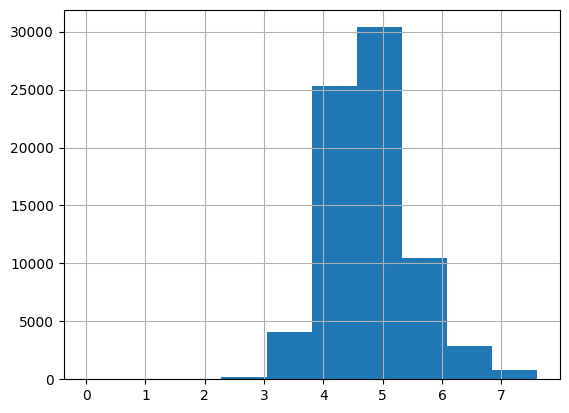

In [4]:
%matplotlib inline
airbnbData['log_price'].hist()

In [5]:
# Looking at sample rows in the data
airbnbData.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
# Looking at sample rows in the data
airbnbData.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0


In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
airbnbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
# Looking at the descriptive statistics of the data
airbnbData.describe(include="all")

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.411100e+04,74111.000000,74111,74111,74111,74111.000000,73911.000000,74111,74111,74111,...,74111.000000,74111.000000,74111,67239,74111.000000,57389.000000,65895,73145,74020.000000,73980.000000
unique,NaN,NaN,35,3,67122,NaN,NaN,5,5,2,...,NaN,NaN,73359,619,NaN,NaN,65883,769,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,NaN,NaN,Bunk bed in the Treat Street Clubhouse,Williamsburg,NaN,NaN,https://a0.muscache.com/im/pictures/70087089/b...,11211.0,NaN,NaN
freq,NaN,NaN,49003,41310,586,NaN,NaN,72028,32374,54403,...,NaN,NaN,8,2862,NaN,NaN,3,1368,NaN,NaN
mean,1.126662e+07,4.782069,NaN,NaN,NaN,3.155146,1.235263,NaN,NaN,NaN,...,38.445958,-92.397525,NaN,NaN,20.900568,94.067365,NaN,NaN,1.265793,1.710868
std,6.081735e+06,0.717394,NaN,NaN,NaN,2.153589,0.582044,NaN,NaN,NaN,...,3.080167,21.705322,NaN,NaN,37.828641,7.836556,NaN,NaN,0.852143,1.254142
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,33.338905,-122.511500,NaN,NaN,0.000000,20.000000,NaN,NaN,0.000000,0.000000
25%,6.261964e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,34.127908,-118.342374,NaN,NaN,1.000000,92.000000,NaN,NaN,1.000000,1.000000
50%,1.225415e+07,4.709530,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,40.662138,-76.996965,NaN,NaN,6.000000,96.000000,NaN,NaN,1.000000,1.000000
75%,1.640226e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,40.746096,-73.954660,NaN,NaN,23.000000,100.000000,NaN,NaN,1.000000,2.000000


In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
airbnbData.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [10]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

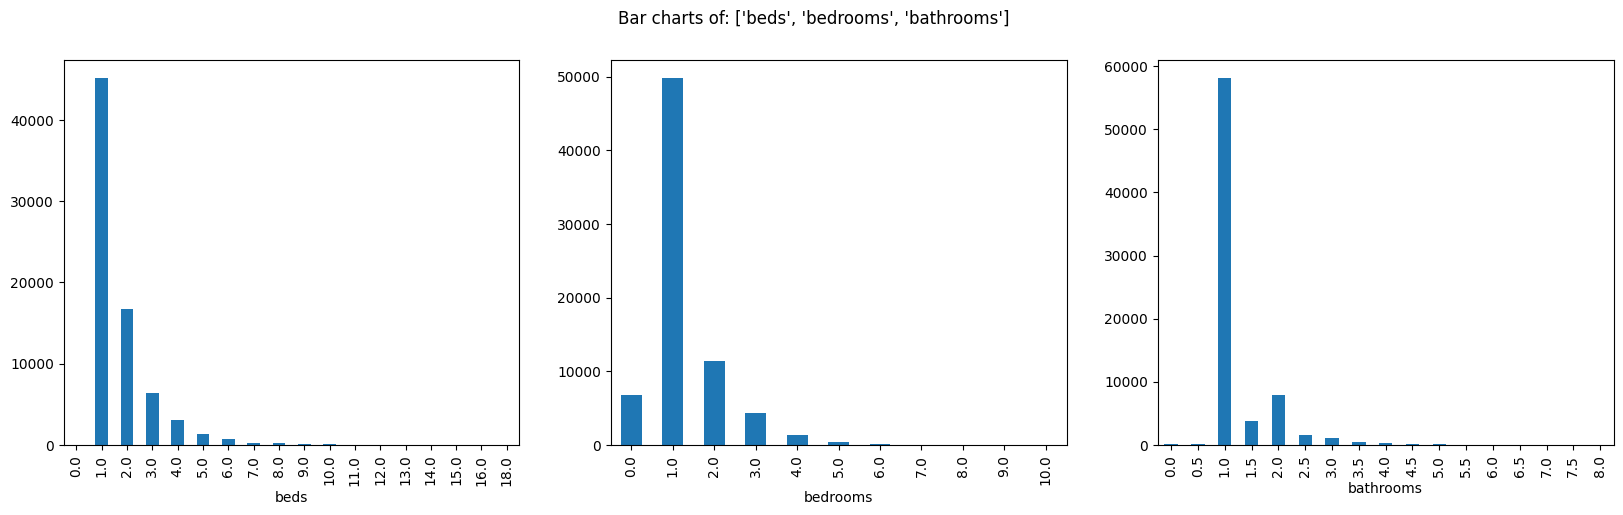

In [11]:

PlotBarCharts(inpData=airbnbData, colsToPlot=['beds',"bedrooms","bathrooms"])

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>, <Axes: >]], dtype=object)

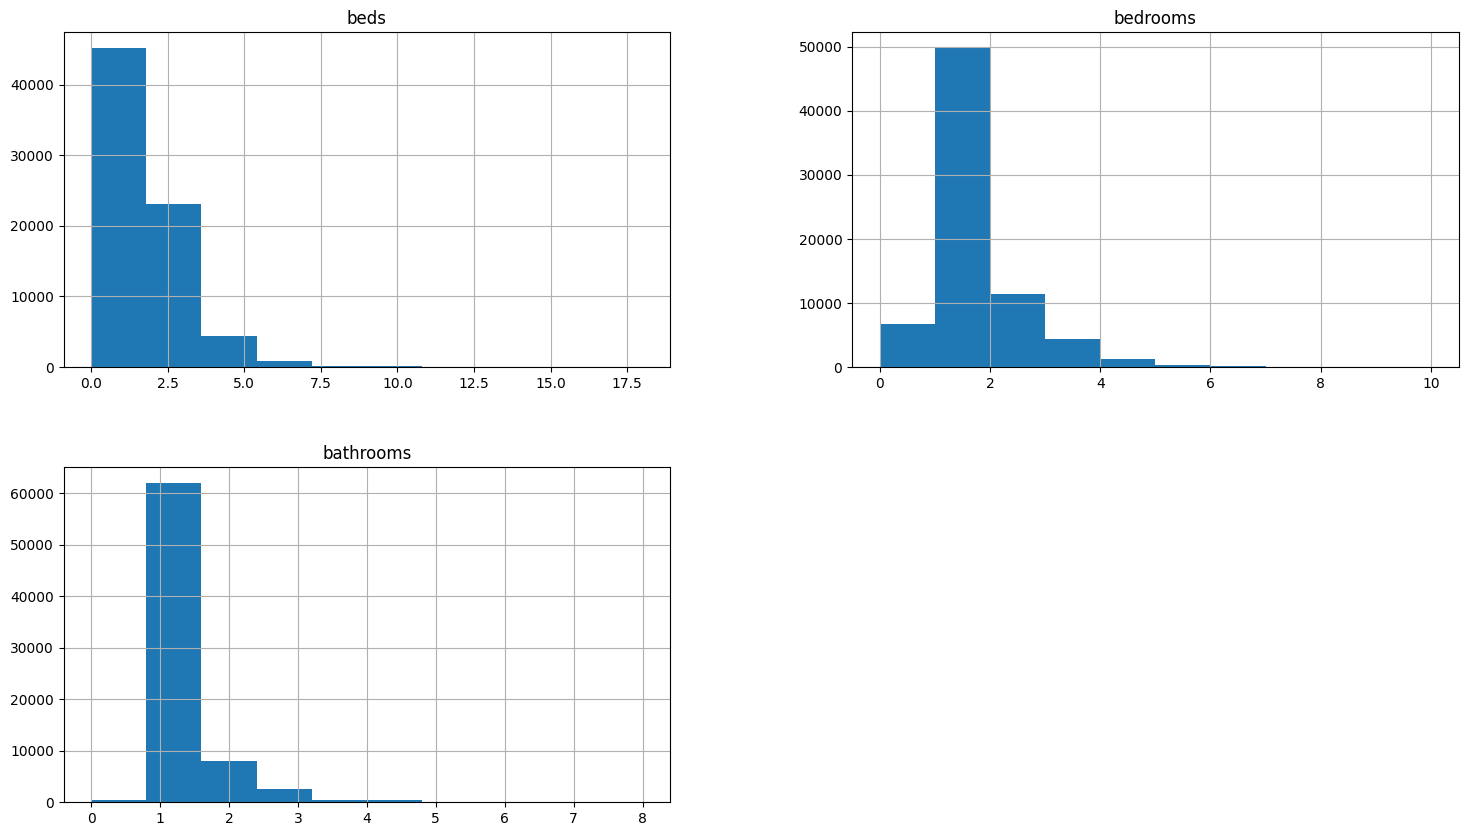

In [12]:
# Plotting histograms of multiple columns together
airbnbData.hist(['beds',"bedrooms","bathrooms"], figsize=(18,10))

<Axes: xlabel='beds', ylabel='Density'>

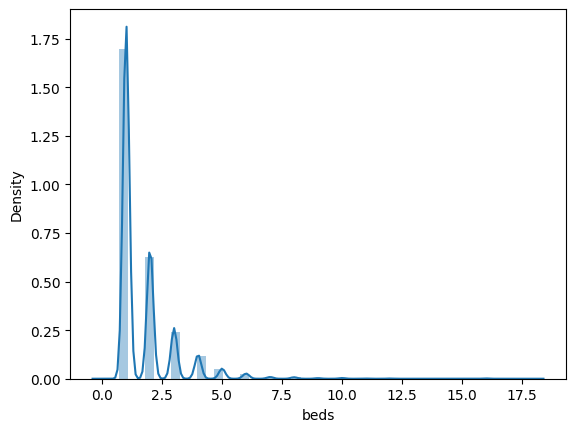

In [13]:
seaborn.distplot(airbnbData['beds'])

<Axes: xlabel='bathrooms', ylabel='Density'>

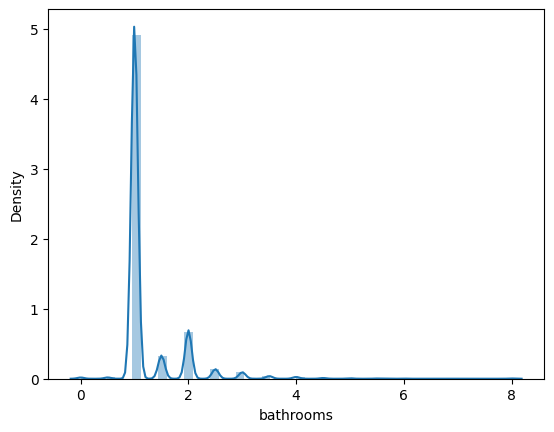

In [14]:
seaborn.distplot(airbnbData['bathrooms'])

<Axes: xlabel='bedrooms', ylabel='Density'>

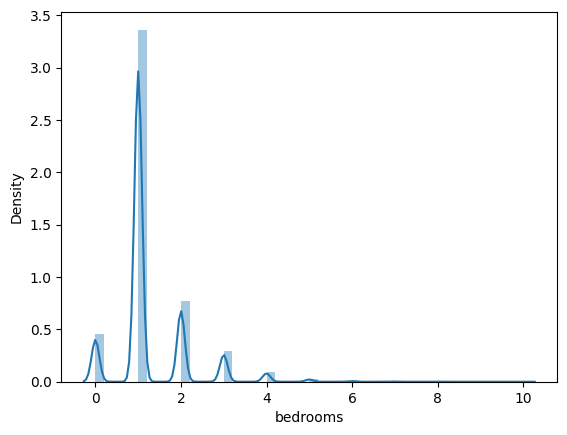

In [15]:
seaborn.distplot(airbnbData["bedrooms"])

<Axes: xlabel='review_scores_rating', ylabel='Density'>

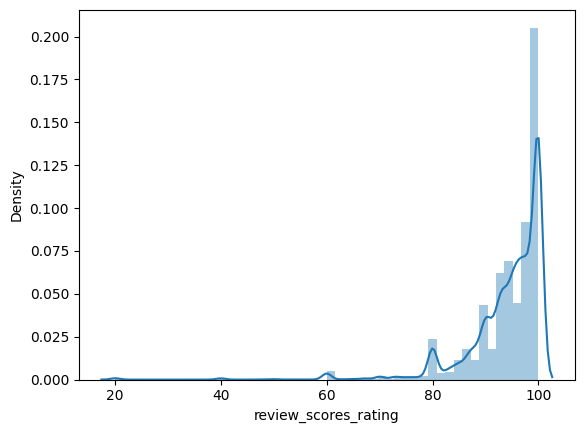

In [16]:
seaborn.distplot(airbnbData["review_scores_rating"])

In [17]:
amenites = []
for x in airbnbData["amenities"]:
    amenites.append(len(x))

airbnbData["amenities"] = amenites

In [18]:
def bar_chart(col,ty):
    seaborn.set(font_scale=1.5)
    seaborn.catplot(x=col,kind=ty,data=airbnbData,aspect=2)

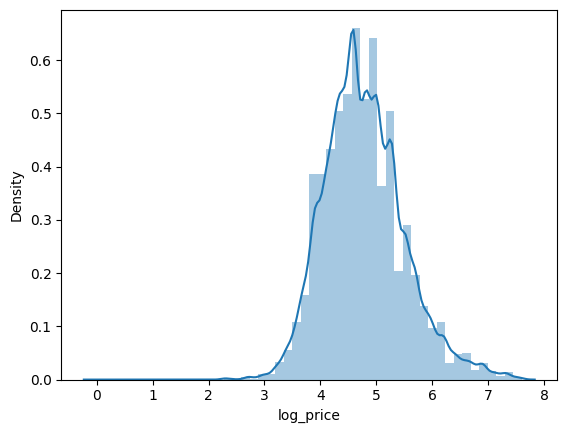

In [19]:
plt.figure()
seaborn.distplot(airbnbData["log_price"])
plt.show()

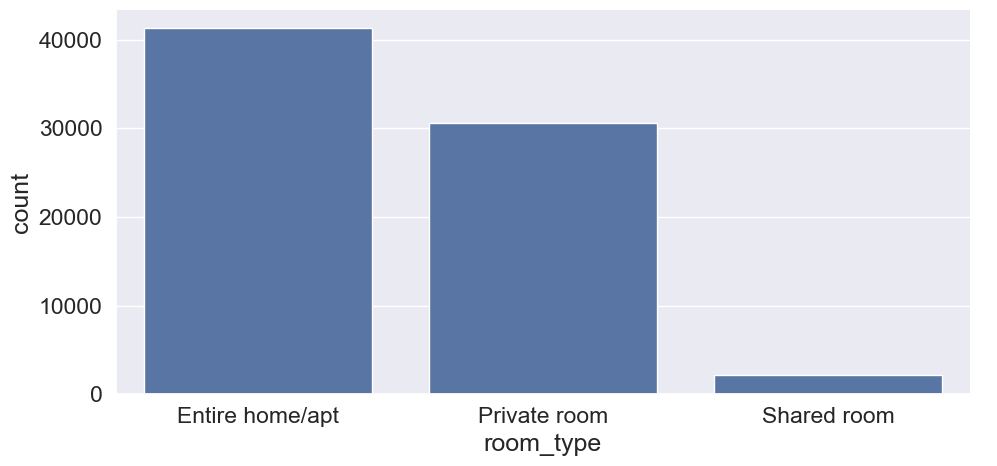

In [20]:
bar_chart("room_type","count")

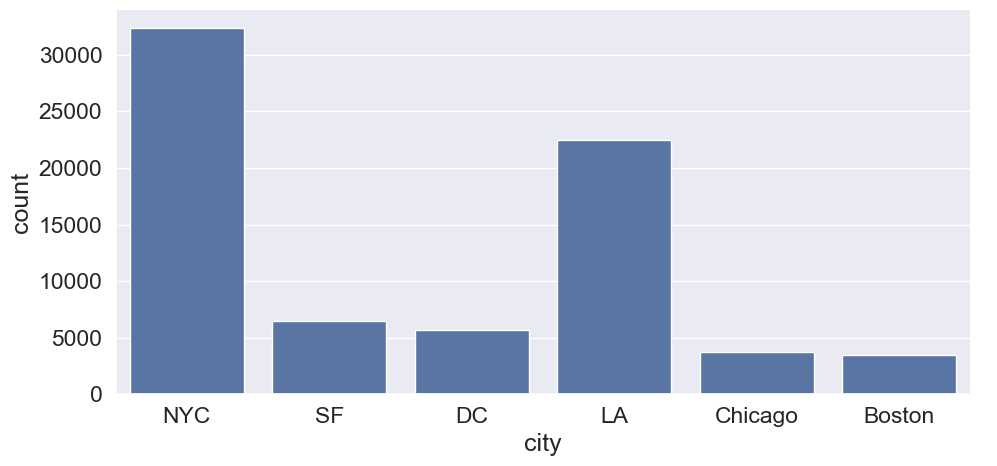

In [21]:
bar_chart("city","count")

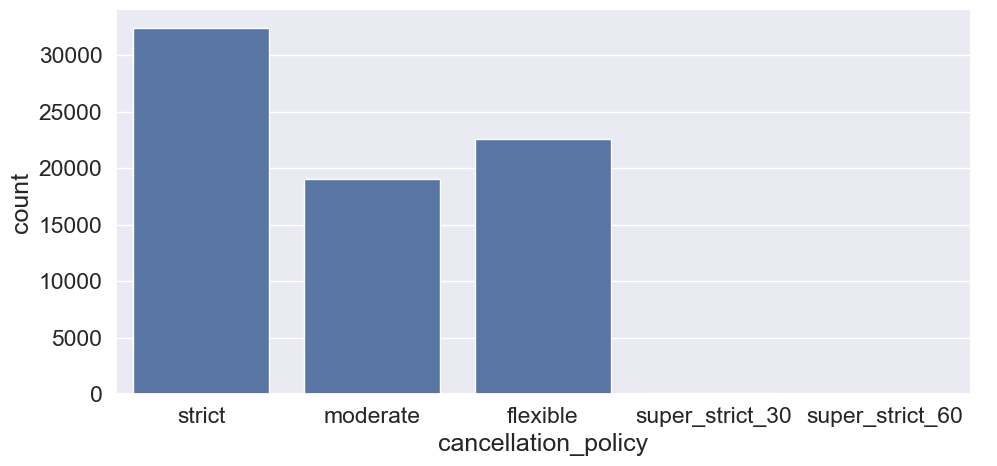

In [22]:
bar_chart("cancellation_policy","count")

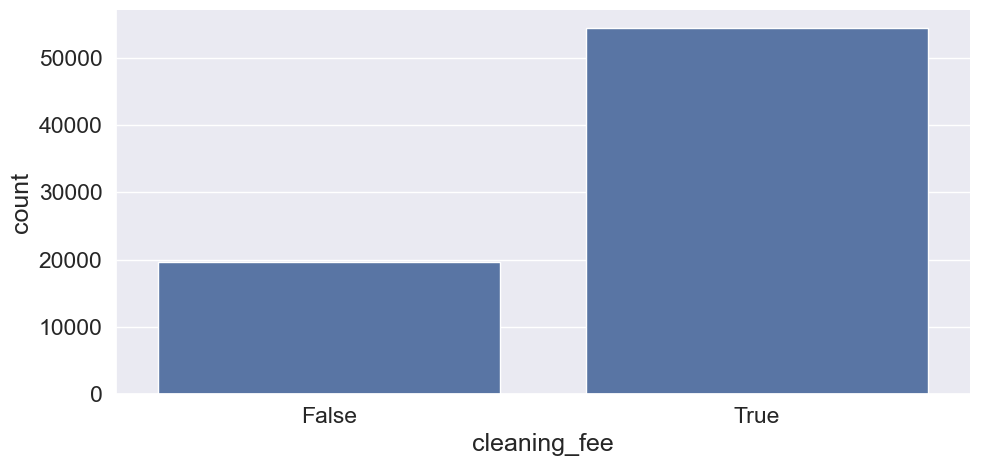

In [23]:
bar_chart("cleaning_fee","count")

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,152,3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,218,7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,311,5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,210,4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,174,2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,2,1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,224,4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,402,5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,189,2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


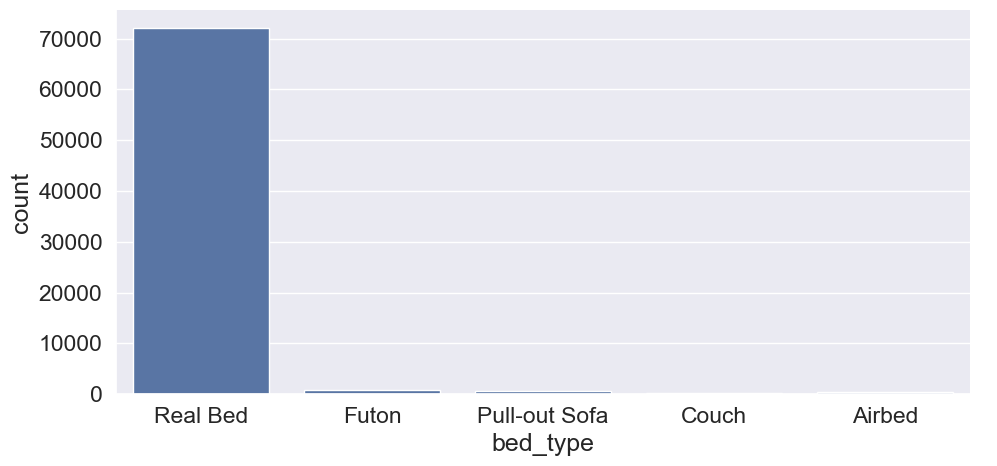

In [24]:
bar_chart("bed_type","count")
airbnbData

In [25]:
target_col = []
for x in airbnbData.columns:
    if airbnbData[x].dtypes != "float64" and airbnbData[x].dtypes != "int64":
        target_col.append(x)


In [26]:
from sklearn.preprocessing import LabelEncoder
labelenco = LabelEncoder()
for col in target_col:
    airbnbData[col] = labelenco.fit_transform(airbnbData[col])


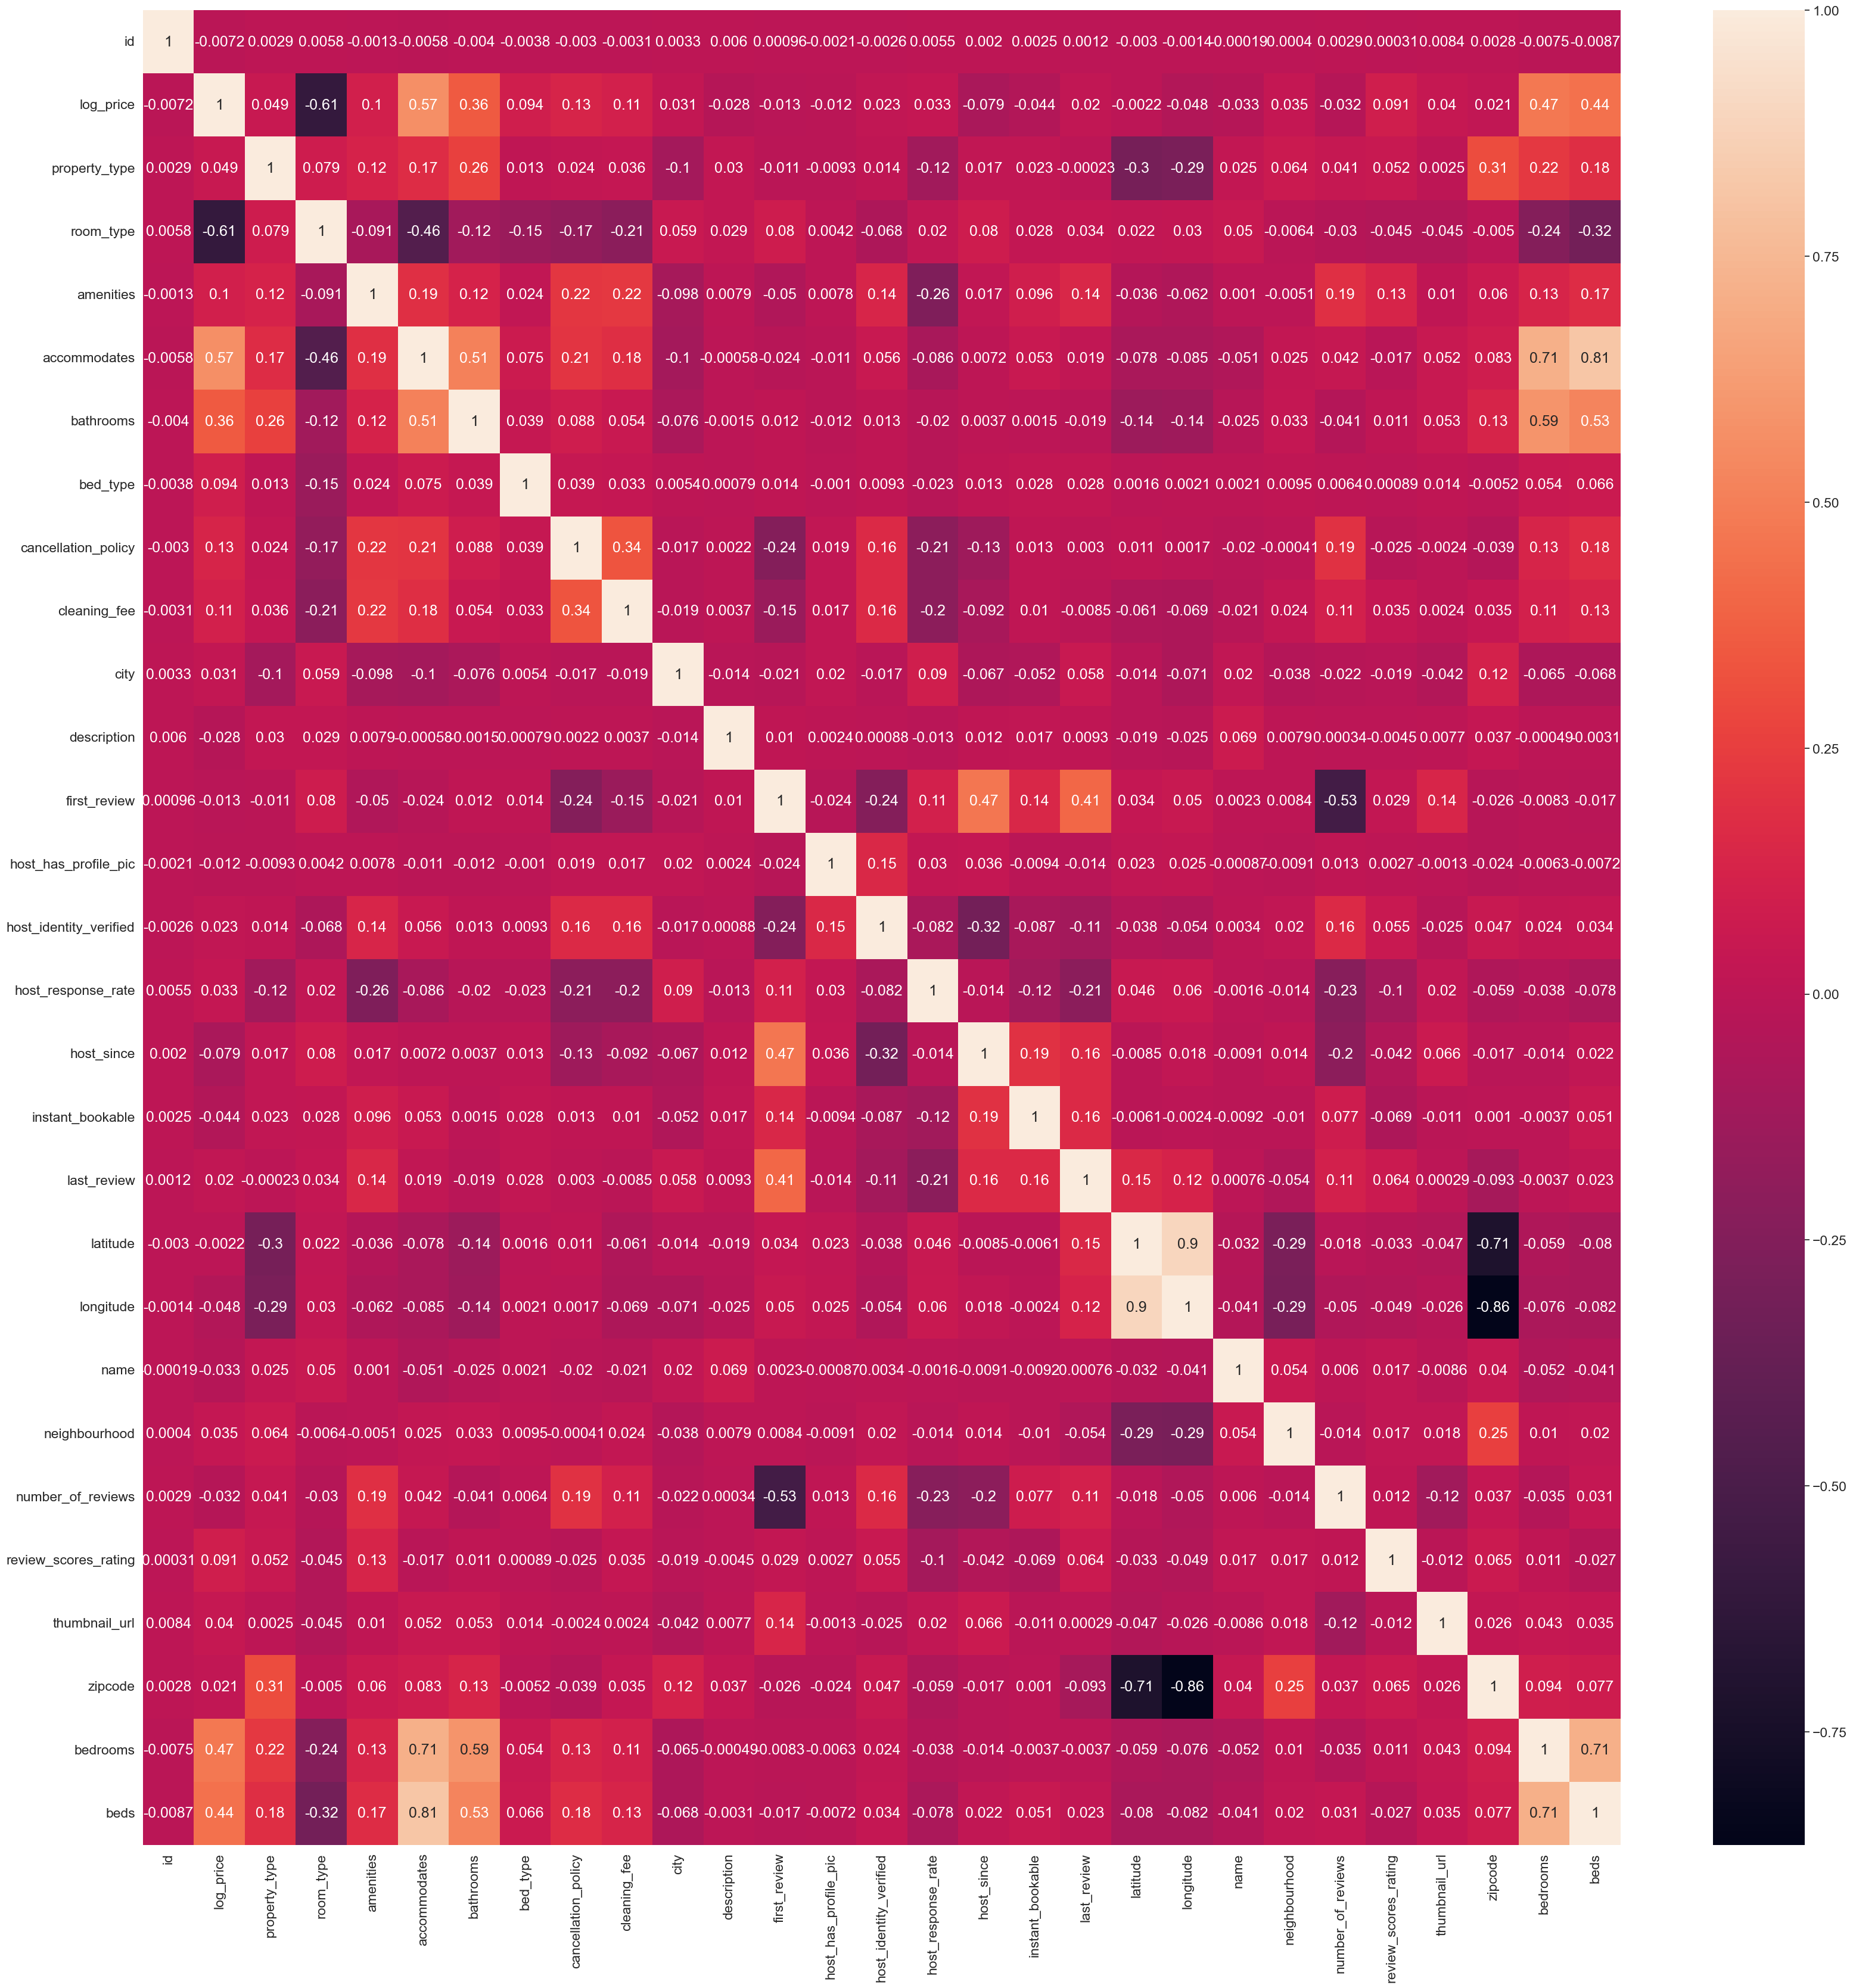

In [27]:
plt.figure(figsize=(40,40))
seaborn.heatmap(airbnbData.corr(),annot=True)
plt.show()

In [28]:
airbnbData["bedrooms"] = airbnbData['bedrooms'].fillna((airbnbData["bathrooms"].median()))
airbnbData["beds"] = airbnbData["beds"].fillna((airbnbData["beds"].median()))
airbnbData["bathrooms"] = airbnbData['bathrooms'].fillna(round(airbnbData["bathrooms"].median()))
airbnbData["review_scores_rating"] = airbnbData["review_scores_rating"].fillna(0)
airbnbData.last_review.fillna(method="ffill",inplace=True)
airbnbData.first_review.fillna(method="ffill",inplace=True)
airbnbData.host_since.fillna(method="ffill",inplace=True)

In [29]:
x = airbnbData.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood","thumbnail_url", "zipcode"],axis = 1)
y = airbnbData.log_price
x

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,0,0,152,3,1.0,4,2,1,4,1,1,80,0,40.696524,-73.991617,2,100.0,1.0,1.0
1,0,0,218,7,1.0,4,2,1,4,1,0,2,1,40.766115,-73.989040,6,93.0,3.0,3.0
2,0,0,311,5,1.0,4,1,1,4,1,1,2,1,40.808110,-73.943756,10,92.0,1.0,3.0
3,17,0,210,4,1.0,4,0,1,5,1,1,80,0,37.772004,-122.431619,0,0.0,2.0,2.0
4,0,0,174,2,1.0,4,1,1,2,1,1,2,1,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,1,2,1,1.0,4,0,0,4,1,1,80,0,40.709025,-73.939405,0,0.0,1.0,1.0
74107,0,0,224,4,2.0,4,1,1,3,1,0,2,0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,0,0,402,5,1.0,4,1,1,4,1,1,2,1,40.706749,-73.942377,43,94.0,2.0,2.0
74109,0,0,189,2,1.0,4,2,1,4,1,0,2,1,40.738535,-74.000157,0,0.0,0.0,2.0


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)

print('Mean Absolute Error of Linear Regression     : ', mae_lr)
print('Mean Squarred Error of Linear Regression     : ', mse_lr)
print('Root Mean Squarred Error of Linear Regression: ', rmse_lr)
print('R2 Score of Linear Regression                : ', r2_lr)

Mean Absolute Error of Linear Regression     :  0.3687069373508573
Mean Squarred Error of Linear Regression     :  0.23466160978231476
Root Mean Squarred Error of Linear Regression:  0.4844188371464458
R2 Score of Linear Regression                :  0.5468764798215815


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)

print('Mean Absolute Error of Random Forest Regression     : ', mae_rf)
print('Mean Squarred Error of Random Forest Regression     : ', mse_rf)
print('Root Mean Squarred Error of Random Forest Regression: ', rmse_rf)
print('R2 Score of Random Forest Regression                : ', r2_rf)

Mean Absolute Error of Random Forest Regression     :  0.2836873949641617
Mean Squarred Error of Random Forest Regression     :  0.15527456466723114
Root Mean Squarred Error of Random Forest Regression:  0.3940489368939233
R2 Score of Random Forest Regression                :  0.7001701411600483


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)

print('Mean Absolute Error of Polynomial Regression     : ', mae_poly)
print('Mean Squarred Error of Polynomial Regression     : ', mse_poly)
print('Root Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('R2 Score of Polynomial Regression                : ', r2_poly)

Mean Absolute Error of Polynomial Regression     :  0.3423235480740224
Mean Squarred Error of Polynomial Regression     :  0.203851002510621
Root Mean Squarred Error of Polynomial Regression:  0.45149861850355755
R2 Score of Polynomial Regression                :  0.6063707057358061


In [34]:
from catboost import CatBoostRegressor
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)

Learning rate set to 0.078038
0:	learn: 0.6884814	total: 63ms	remaining: 1m 2s
1:	learn: 0.6629188	total: 71.1ms	remaining: 35.5s
2:	learn: 0.6397968	total: 76.1ms	remaining: 25.3s
3:	learn: 0.6197053	total: 81.8ms	remaining: 20.4s
4:	learn: 0.6022100	total: 88.6ms	remaining: 17.6s
5:	learn: 0.5867609	total: 96.3ms	remaining: 16s
6:	learn: 0.5716923	total: 102ms	remaining: 14.5s
7:	learn: 0.5592553	total: 109ms	remaining: 13.5s
8:	learn: 0.5475392	total: 116ms	remaining: 12.8s
9:	learn: 0.5373710	total: 122ms	remaining: 12.1s
10:	learn: 0.5274211	total: 130ms	remaining: 11.7s
11:	learn: 0.5182308	total: 136ms	remaining: 11.2s
12:	learn: 0.5107779	total: 140ms	remaining: 10.6s
13:	learn: 0.5038525	total: 143ms	remaining: 10.1s
14:	learn: 0.4975683	total: 147ms	remaining: 9.64s
15:	learn: 0.4914023	total: 150ms	remaining: 9.24s
16:	learn: 0.4865003	total: 153ms	remaining: 8.87s
17:	learn: 0.4820088	total: 157ms	remaining: 8.54s
18:	learn: 0.4773001	total: 160ms	remaining: 8.27s
19:	learn

In [35]:
y_pred_cbr

array([4.42421634, 5.58422542, 5.08672966, ..., 5.24072949, 4.80336986,
       4.26199039])

In [36]:
print('Mean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('Mean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('Root Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('R2 Score of CatBoost Regressor                : ', r2_cbr)

Mean Absolute Error of CatBoost Regressor     :  0.27727867487984
Mean Squarred Error of CatBoost Regressor     :  0.14509724798447202
Root Mean Squarred Error of CatBoost Regressor:  0.380916326749684
R2 Score of CatBoost Regressor                :  0.7198221906177348


In [37]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,}

a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.546876,0.368707,0.234662,0.484419
Random Forest,0.700170,0.283687,0.155275,0.394049
Polynomial Regression,0.606371,0.342324,0.203851,0.451499
CatBoost,0.719822,0.277279,0.145097,0.380916


will be using lr

In [38]:
targetVarible = "log_price"
predictors = [	"property_type",	"room_type",	"amenities",	"accommodates",	"bathrooms",	"bed_type",	"cancellation_policy",	"cleaning_fee",	"city",	"host_has_profile_pic",	"host_identity_verified",	"host_response_rate",	"instant_bookable",	"latitude",	"longitude",	"number_of_reviews",	"review_scores_rating",	"bedrooms","beds"]

TestingDataResults=pd.DataFrame(data=x_test, columns=predictors)
TestingDataResults[targetVarible]=y_test
TestingDataResults[('Predicted'+targetVarible)]=np.round(y_pred_lr)

In [39]:
TestingDataResults.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price,Predictedlog_price
22986,0,1,325,2,1.0,4,1,1,3,1,...,80,0,33.986854,-118.444650,1,0.0,1.0,1.0,4.174387,4.0
58564,11,0,346,2,2.0,4,0,1,3,1,...,80,0,34.021512,-118.507665,0,0.0,1.0,1.0,6.204558,5.0
44938,17,0,317,2,1.0,1,0,1,3,1,...,80,0,34.634175,-118.251396,0,0.0,4.0,1.0,4.605170,6.0
68730,0,1,216,2,1.0,4,2,1,4,1,...,2,1,40.691319,-73.944936,1,100.0,1.0,1.0,5.010635,4.0
32368,0,1,114,3,1.0,4,2,1,3,1,...,2,0,33.898229,-118.292912,3,93.0,1.0,1.0,3.526361,4.0


In [40]:
TestingDataResults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14823 entries, 22986 to 69317
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           14823 non-null  int64  
 1   room_type               14823 non-null  int64  
 2   amenities               14823 non-null  int64  
 3   accommodates            14823 non-null  int64  
 4   bathrooms               14823 non-null  float64
 5   bed_type                14823 non-null  int64  
 6   cancellation_policy     14823 non-null  int64  
 7   cleaning_fee            14823 non-null  int64  
 8   city                    14823 non-null  int64  
 9   host_has_profile_pic    14823 non-null  int64  
 10  host_identity_verified  14823 non-null  int64  
 11  host_response_rate      14823 non-null  int64  
 12  instant_bookable        14823 non-null  int64  
 13  latitude                14823 non-null  float64
 14  longitude               14823 non-null 